## 1 Statistics

#### 1) Compute the following statistics for each component of X and Y: mean, maximum, minimum, 25th percentile, 90th percentile, and standard deviation.

In [3]:
import pandas as pd
import numpy as np

# Read X data set into a pandas DataFrame named X
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

# Compute the following statistics for each component of X and Y: 
# mean, maximum, minimum, 25th percentile, 90th percentile, and standard deviation.
print("------")
print("Mean of each component of X:")
print(np.round(X.loc[:, X.columns != 'TimeStamp'].mean(), decimals=2))
print("Mean of each component of Y:")

print("------")
print("Maximum value of each component of X:")
print(np.round(X.loc[:, X.columns != 'TimeStamp'].max(), decimals=2))
print("Maximum value of each component of Y:")
print(np.round(Y.loc[:, Y.columns != 'TimeStamp'].max(), decimals=2))

print("------")
print("Mininmum value of each component of X:")
print(np.round(X.loc[:, X.columns != 'TimeStamp'].min(), decimals=2))
print("Minimum value of each component of Y:")
print(np.round(Y.loc[:, Y.columns != 'TimeStamp'].min(), decimals=2))

print("------")
print("25th percentile of each component of X:")
print(np.round(X.loc[:, X.columns != 'TimeStamp'].quantile(.25), decimals=2))
print("25th percentile of each component of Y:")
print(np.round(Y.loc[:, Y.columns != 'TimeStamp'].quantile(.25), decimals=2))

print("------")
print("90th percentile of each component of X:")
print(np.round(X.loc[:, X.columns != 'TimeStamp'].quantile(.90), decimals=2))
print("90th percentile of each component of Y:")
print(np.round(Y.loc[:, Y.columns != 'TimeStamp'].quantile(.90), decimals=2))

print("------")
print("standard deviation of each component of X:")
print(np.round(X.loc[:, X.columns != 'TimeStamp'].std(), decimals=2))
print("standard deviation of each component of Y:")
print(np.round(Y.loc[:, Y.columns != 'TimeStamp'].std(), decimals=2))

------
Mean of each component of X:
runq-sz          70.73
%%memused        19.64
proc/s            7.52
cswch/s       53671.17
all_%%usr        86.30
ldavg-1          74.48
totsck          489.14
pgfree/s     129287.48
plist-sz        888.75
file-nr        2631.17
idel/s           37.27
tps               4.07
dtype: float64
Mean of each component of Y:
------
Maximum value of each component of X:
runq-sz         154.00
%%memused        26.38
proc/s           53.00
cswch/s       82299.00
all_%%usr        98.25
ldavg-1         142.10
totsck          728.00
pgfree/s     210520.00
plist-sz       1376.00
file-nr        2928.00
idel/s          592.00
tps              54.00
dtype: float64
Maximum value of each component of Y:
DispFrames    27.61
dtype: float64
------
Mininmum value of each component of X:
runq-sz          0.00
%%memused       13.99
proc/s           0.00
cswch/s       6525.00
all_%%usr       13.84
ldavg-1          6.00
totsck         262.00
pgfree/s     17452.00
plist-sz     

## 2) Compute the following quantity:

#### a) The number of observations with CPU utilization ("all_%%usr") smaller than 90% and memory utilization ("%%memused") smaller than 50%;

In [6]:
# (a)
print("The number of observations with CPU util < 90%: ", 
      X[X['all_%%usr'] < 90]['all_%%usr'].count())
print("The number of observations with mem used < 50%: ", 
      X[X['%%memused'] < 50]['%%memused'].count())



The number of observations with CPU util < 90%:  996
The number of observations with mem used < 50%:  3600


#### b) The average number of used sockets ("totsck") for observations with less than 60000 context switches per seconds ("cswch/s").

In [7]:
# (b)
print("The average number of used sockets for observations with cswch/s < 60000: ",
      np.round(X[X['cswch/s'] < 60000]["totsck"].mean(), decimals=2))

The average number of used sockets for observations with cswch/s < 60000:  352.09


## 3) Data visualization

#### a) Time series of memory usage ("%%memused") and CPU utilization ("all_%%usr"), both curves in a single plot. 

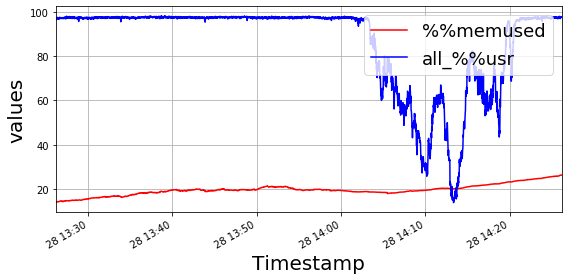

In [15]:
import matplotlib.pyplot as plt

timeIndex = pd.to_datetime(X['TimeStamp'], unit='s')
X.index = timeIndex

# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Produce the plots for specified features sets
memused = X['%%memused'].plot(color='r')
cpu = X['all_%%usr'].plot(color='b')
axes.grid(True)

# Customizing plot (changing font size, labels)
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('values', fontsize=font_size)
plt.legend(('%%memused','all_%%usr'), loc = 'upper right', 
           shadow=False, fancybox=True, fontsize=font_size-2)
plt.tight_layout()
plt.show()

##### Graph explanation

From the graph, we can see that from 28:14:00 to 28:14:20, the server CPU had less workload. However, the memory consumption shows a steady increase from the beginning of the observation.

#### (b) Box plot of memory usage (“%%memused”) and CPU utilization (“all %%usr”) in a single plot.

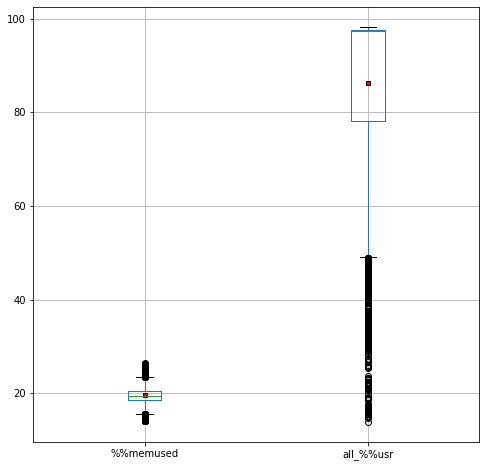

In [30]:
X = pd.read_csv('X.csv')

fig_memused, axes_memused = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

memused = X['%%memused']

# Add an square box for average value
plt.plot(1, memused.mean(), 's', 
         markersize = 4, markerfacecolor = 'red', markeredgecolor = 'black')

cpu_util = X['all_%%usr']

# Add an square box for average value
plt.plot(2, cpu_util.mean(), 's', 
         markersize = 4, markerfacecolor = 'red', markeredgecolor = 'black')
X.boxplot(column = ['%%memused', 'all_%%usr'])

##### Graph explanation

This boxplot shows the average (in the red dot), maximum, minimum, as well as the standard deviation of the dataframe (in the white box).

#### (c) Density plots of memory usage (“%%memused”) and CPU utilization (“all %%usr”) (two plots).

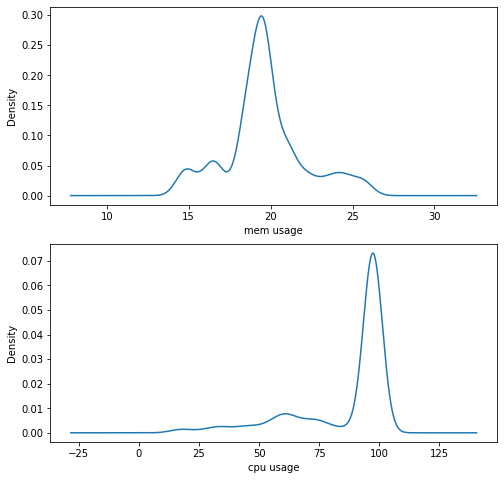

In [17]:
plt.subplots(nrows = 2, ncols = 1, figsize = (8, 8))

plt.subplot(2, 1, 1)
X["%%memused"].plot.kde()
plt.xlabel("mem usage")

plt.subplot(2, 1, 2)
X["all_%%usr"].plot.kde()
plt.xlabel("cpu usage")

plt.show()

##### Graph explanation

These density plot shows the frequency density of the particular x value. The most frequent memory usage is around 20%, while the most frequent CPU usage is almost 100%.

#### (d) Histograms of memory usage (“%%memused”) and CPU utilization (“all %%usr”)(two plots).

(array([   2.,   14.,   10.,    9.,    2.,    4.,    4.,    7.,    6.,
           4.,    0.,    3.,    2.,    7.,    4.,    4.,   13.,   15.,
           8.,   16.,   10.,    9.,    7.,    7.,    9.,    6.,    6.,
           9.,    9.,   12.,   15.,   11.,   12.,    9.,   15.,   10.,
           6.,    4.,   10.,   19.,   23.,   22.,   16.,   19.,   43.,
          30.,   41.,   35.,   27.,   30.,   29.,   19.,   16.,   17.,
          17.,   14.,   26.,   17.,   31.,   28.,   13.,   15.,   28.,
          16.,   13.,   10.,    7.,    6.,    6.,   10.,    5.,   13.,
          10.,    5.,    7.,    4.,    6.,    6.,    3.,   10.,   16.,
          59.,  642., 1861.]),
 array([13.84      , 14.84488095, 15.8497619 , 16.85464286, 17.85952381,
        18.86440476, 19.86928571, 20.87416667, 21.87904762, 22.88392857,
        23.88880952, 24.89369048, 25.89857143, 26.90345238, 27.90833333,
        28.91321429, 29.91809524, 30.92297619, 31.92785714, 32.9327381 ,
        33.93761905, 34.9425    , 35.9

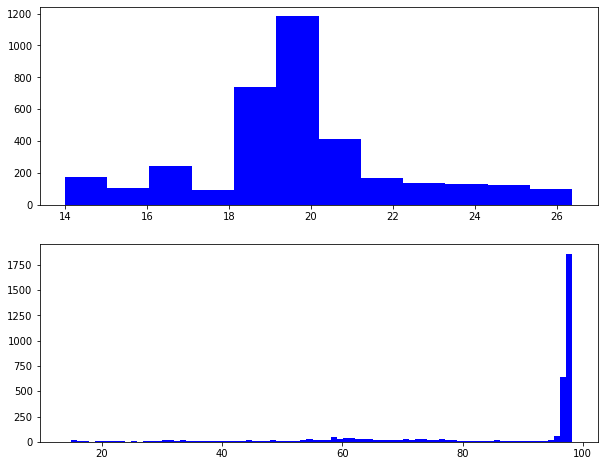

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 8))

memused_bins = int(X['%%memused'].max() - X['%%memused'].min())
axes[0].hist(X['%%memused'], bins = memused_bins, color='b')

cpu_bins = int(X['all_%%usr'].max() - X['all_%%usr'].min()) 
axes[1].hist(X['all_%%usr'], bins = cpu_bins, color='b')

##### Graph explanation

These histogram also gives the information about the frequency. However, instead of giving the density value, it shows the actual number of frequency in Y axis.